In [11]:
# 对于SVM，存在一个分类面，两个点集到此平面的最小距离最大，两个点集中的边缘点到此平面的距离最大。

import numpy as np
from matplotlib import colors
from sklearn import svm 
from sklearn import model_selection
import matplotlib.pyplot as plt
import matplotlib as mpl



In [12]:
# *************将字符串转为整型，便于数据加载***********************
# 在函数中建立一个对应字典就可以了，输入字符串，输出字符串对应的数字。
def rock_type(s):
    #     print(type(s))
    # 字符串加个b是指btypes 字节串类型
    it = {b'circle': 0, b'square': 1}
    return it[s]


# 加载数据
data_path = '../dataset/train8/train8.txt'  # 数据文件的路径
data = np.loadtxt(data_path,  # 数据文件路径
                  dtype=float,  # 数据类型
                  delimiter=','  # 数据分隔符
                #   converters={2: rock_type}
                  )  # 将第5列使用函数iris_type进行转换
# print(data)                                                 #data为二维数组，data.shape=(150, 5)
# print(data.shape)
# 数据分割
x, y = np.split(data,  # 要切分的数组
                (4,),  # 沿轴切分的位置，第3列开始往后为y
                axis=1)  # 1代表纵向分割，按列分割

x = x[:, 0:2]
# 第一个逗号之前表示行，只有冒号表示所有行，第二个冒号0:2表是0,1两列
# 在X中我们取前两列作为特征，为了后面的可视化，原始的四维不好画图。x[:,0:4]代表第一维(行)全取，第二维(列)取0~2
# print(x)
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    x,  # 所要划分的样本特征集
    y,  # 所要划分的样本结果
    random_state=1,  # 随机数种子确保产生的随机数组相同
    test_size=0.3)  # 测试样本占比
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)



(22772, 2)
(22772, 1)
(9760, 2)
(9760, 1)


In [13]:
# create model
# **********************SVM分类器构建*************************
def classifier():
    #clf = svm.SVC(C=0.8,kernel='rbf', gamma=50,decision_function_shape='ovr')
    clf = svm.SVC(C=0.5,  # 误差项惩罚系数,默认值是1
                  kernel='linear',  # 线性核 kenrel="rbf":高斯核
                  decision_function_shape='ovr')  # 决策函数
    return clf


# 2.定义模型：SVM模型定义
clf = classifier()


In [14]:
y_train.ravel()  # ravel()扁平化，将原来的二维数组转换为一维数组
print(x_train.ravel())

[ 0.37752154 -0.43536758  0.7702657  ... -1.31828082  1.37003779
 -1.45223999]


In [15]:
# 模型训练

# y_train.ravel()  # ravel()扁平化，将原来的二维数组转换为一维数组
# ***********************训练模型*****************************


def train(clf, x_train, y_train):
    clf.fit(x_train,  # 训练集特征向量，fit表示输入数据开始拟合
            y_train.ravel())  # 训练集目标值 ravel()扁平化，将原来的二维数组转换为一维数组


# 3.训练SVM模型
train(clf, x_train, y_train)


In [16]:
# **************并判断a b是否相等，计算acc的均值*************
def show_accuracy(a, b, tip):
    acc = a.ravel() == b.ravel()
    print('%s Accuracy:%.3f' % (tip, np.mean(acc)))


def print_accuracy(clf, x_train, y_train, x_test, y_test):
    # 分别打印训练集和测试集的准确率  score(x_train,y_train):表示输出x_train,y_train在模型上的准确率
    print('trianing prediction:%.3f' % (clf.score(x_train, y_train)))
    print('test data prediction:%.3f' % (clf.score(x_test, y_test)))
    # 原始结果与预测结果进行对比   predict()表示对x_train样本进行预测，返回样本类别
    show_accuracy(clf.predict(x_train), y_train, 'traing data')
    show_accuracy(clf.predict(x_test), y_test, 'testing data')
    # 计算决策函数的值，表示x到各分割平面的距离,3类，所以有3个决策函数，不同的多类情况有不同的决策函数？
    print('decision_function:\n', clf.decision_function(x_train))


# 4.模型评估
print_accuracy(clf, x_train, y_train, x_test, y_test)


trianing prediction:1.000
test data prediction:1.000
traing data Accuracy:1.000
testing data Accuracy:1.000
decision_function:
 [-2.84182735 -1.06418313 -2.88782201 ... -1.02143967  1.33876286
  2.04914294]


In [17]:
print(x[:, 0])
print(x_test.shape)

[1.36394882 0.31663096 0.42318946 ... 1.34872615 0.75504309 0.36838797]
(9760, 2)


In [18]:
# 取样，取10%，不然数据太多了看不清
# https://blog.csdn.net/weixin_42201701/article/details/86655721

# x_random =[]
# for i in range(0,300):
#        x_random.append(np.random.choice(x.shape[0],1))
# x_random = x.copy()
# np.random.shuffle(x_random)
# x_plot = x_random[:300, :]

# x_test_random = x.copy()
# np.random.shuffle(x_test_random)
# x_test_plot = x_test_random[:300, :]

# y_random = y.copy()
# np.random.shuffle(y_random)
# y_plot = y_random[:300, :]
# x_test_random = np.random.choice(x.shape[0],300)
# y_random = np.random.choice(x.shape[0],300)

# x_plot = x[row_rand_array1[0:300]]

# row_rand_array = np.arange(x_test.shape[0])

# np.random.choice(row_rand_array)

# x_test_plot = x_test[row_rand_array[0:300]]

# y_plot = np.random.choice(y.flatten(), size=300)

nums1=3000
nums2=1000

total_x=np.hstack((x,y))
total_x_test=np.hstack((x_test,y_test))


x_random = total_x.copy()
np.random.shuffle(x_random)
x_plot = x_random[:nums1, :2]
y_plot = x_random[:nums1, 2:3]

x_test_random = total_x_test.copy()
np.random.shuffle(x_test_random)
x_test_plot = x_test_random[:nums2, :2]
y_test_plot= x_test_random[:nums2, 2:3]

print(total_x.shape)
print(total_x_test.shape)
print(x_plot.shape)
print(y_plot.shape)
print(x_test_plot.shape)
print(y_test_plot.shape)
# print(y_plot)



(32532, 3)
(9760, 3)
(3000, 2)
(3000, 1)
(1000, 2)
(1000, 1)


grid_test:
 [[ 0.08555126 -1.97285448]
 [ 0.08555126 -1.96395039]
 [ 0.08555126 -1.95504629]
 ...
 [ 2.30744836 -0.21874707]
 [ 2.30744836 -0.20984297]
 [ 2.30744836 -0.20093888]]
(40000, 2)
the distance to decision plane:
 [0.68436727 0.66029662 0.63622598 ... 0.73772362 0.71365298 0.68958234]
grid_hat:
 [2. 2. 2. ... 2. 2. 2.]


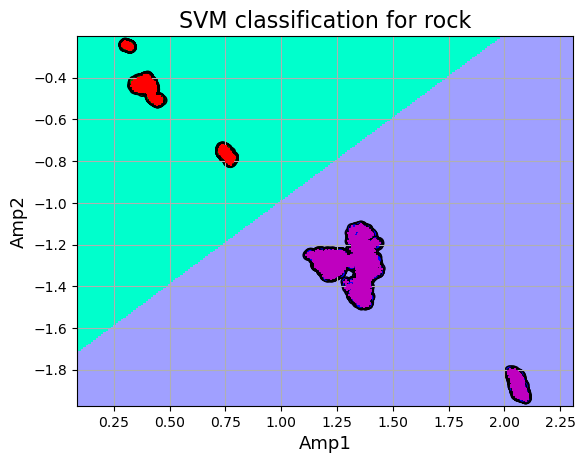

In [19]:
# 可视化及使用
# 所有数据
def draw(clf, x):
    # 标记特征值
    iris_feature = u'Amp1', u'Amp2',u'mean',u'range'
    # 开始画图
    x1_min, x1_max = x[:, 0].min()-(x[:, 0].max())/10, x[:, 0].max()+ (x[:, 0].max())/10 # 第0列的范围
    x2_min, x2_max = x[:, 1].min()-abs((x[:, 1].max())/7), x[:, 1].max()+abs((x[:, 1].max())/7)  # 第1列的范围
    # 生成网格采样点 开始坐标：结束坐标（不包括）：步长
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    # flat将二维数组转换成1个1维的迭代器，然后把x1和x2的所有可能值给匹配成为样本点
    # stack():沿着新的轴加入一系列数组，竖着（按列）增加两个数组，grid_test的shape：(40000, 2)
    grid_test = np.stack((x1.flat, x2.flat), axis=1)
    print('grid_test:\n', grid_test)
    print(grid_test.shape)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)

    # 预测分类值 得到【0,0.。。。1,1,1】
    grid_hat = clf.predict(grid_test)
    print('grid_hat:\n', grid_hat)
    # reshape grid_hat和x1形状一致
    grid_hat = grid_hat.reshape(x1.shape)
    # 若3*3矩阵e，则e.shape()为3*3,表示3行3列
    # light是网格测试点的配色，相当于背景
    # dark是样本点的配色
    cm_light = mpl.colors.ListedColormap(['#00FFCC', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'b'])
    cm_test = mpl.colors.ListedColormap(['r', 'm'])
    # 画出所有网格样本点被判断为的分类，作为背景
    # pcolormesh(x,y,z,cmap)这里参数代入
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    # squeeze()把y的个数为1的维度去掉，也就是变成一维。
    # 所有数据
    
    plt.scatter(x[:, 0], x[:, 1], c=np.squeeze(
        y), edgecolor='k', s=50, cmap=cm_dark)  # 样本点
    # plt.scatter(x_test[:, 0], x_test[:, 1], s=1,
    #             facecolor='red', zorder=10, marker='+')       # 测试点
    plt.scatter(x_test[:, 0], x_test[:, 1], c=np.squeeze(
        y_test), marker='+', zorder=10, s=20, cmap=cm_test)       # 测试点
  
    # 设置坐标标签及字体大小
    plt.xlabel(iris_feature[0], fontsize=13)
    plt.ylabel(iris_feature[1], fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('SVM classification for rock', fontsize=16)
    plt.grid()

    plt.show()


# 5.模型使用
draw(clf, x)


grid_test:
 [[ 0.08555126 -1.97285448]
 [ 0.08555126 -1.96395039]
 [ 0.08555126 -1.95504629]
 ...
 [ 2.30744836 -0.21874707]
 [ 2.30744836 -0.20984297]
 [ 2.30744836 -0.20093888]]
(40000, 2)
the distance to decision plane:
 [0.68436727 0.66029662 0.63622598 ... 0.73772362 0.71365298 0.68958234]
grid_hat:
 [2. 2. 2. ... 2. 2. 2.]


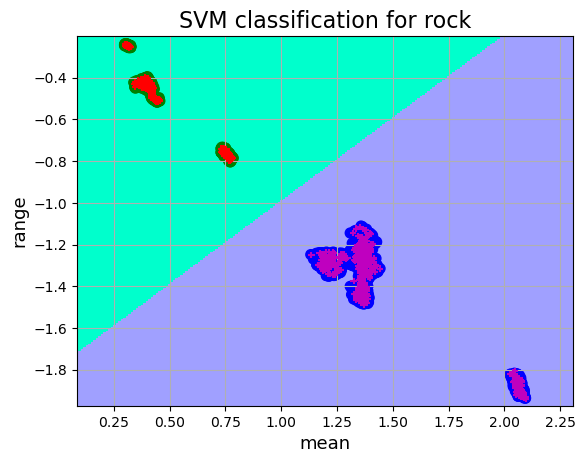

In [20]:
# 可视化及使用
# 10%数据
def draw(clf, x):
    # 标记特征值
    feature = u'Amp1', u'Amp2', u'mean', u'range'
    # 开始画图
    x1_min, x1_max = x[:, 0].min()-(x[:, 0].max()) / \
        10, x[:, 0].max() + (x[:, 0].max())/10  # 第0列的范围
    x2_min, x2_max = x[:, 1].min()-abs((x[:, 1].max())/7), x[:,
                                                             1].max()+abs((x[:, 1].max())/7)  # 第1列的范围
    # 生成网格采样点 开始坐标：结束坐标（不包括）：步长
    x1, x2 = np.mgrid[x1_min:x1_max:200j, x2_min:x2_max:200j]
    # flat将二维数组转换成1个1维的迭代器，然后把x1和x2的所有可能值给匹配成为样本点
    # stack():沿着新的轴加入一系列数组，竖着（按列）增加两个数组，grid_test的shape：(40000, 2)
    grid_test = np.stack((x1.flat, x2.flat), axis=1)
    print('grid_test:\n', grid_test)
    print(grid_test.shape)
    # 输出样本到决策面的距离
    z = clf.decision_function(grid_test)
    print('the distance to decision plane:\n', z)

    # 预测分类值 得到【0,0.。。。1,1,1】
    grid_hat = clf.predict(grid_test)
    print('grid_hat:\n', grid_hat)
    # reshape grid_hat和x1形状一致
    grid_hat = grid_hat.reshape(x1.shape)
    # 若3*3矩阵e，则e.shape()为3*3,表示3行3列
    # light是网格测试点的配色，相当于背景
    # dark是样本点的配色
    cm_light = mpl.colors.ListedColormap(['#00FFCC', '#FFA0A0', '#A0A0FF'])
    cm_dark = mpl.colors.ListedColormap(['g', 'b'])
    cm_test = mpl.colors.ListedColormap(['r', 'm'])
    # 画出所有网格样本点被判断为的分类，作为背景
    # pcolormesh(x,y,z,cmap)这里参数代入
    plt.pcolormesh(x1, x2, grid_hat, cmap=cm_light)
    # x1，x2，grid_hat，cmap=cm_light绘制的是背景。
    # squeeze()把y的个数为1的维度去掉，也就是变成一维。
    # 所有数据

    # 取样，取10%，不然数据太多了看不清

    # print(y_plot)
    # edgecolor='k'
    plt.scatter(x_plot[:, 0], x_plot[:, 1], c=np.squeeze(
        y_plot), s=50, cmap=cm_dark)  # 样本点
    # plt.scatter(x_test_plot[:, 0], x_test_plot[:, 1], s=20,
    #             facecolor='red', zorder=10, marker='+')       # 测试点
    plt.scatter(x_test_plot[:, 0], x_test_plot[:, 1], c=np.squeeze(
        y_test_plot), marker='+', zorder=10, s=20, cmap=cm_test)       # 测试点
    # ,facecolor='red'
    # 设置坐标标签及字体大小
    plt.xlabel(feature[2], fontsize=13)
    plt.ylabel(feature[3], fontsize=13)
    plt.xlim(x1_min, x1_max)
    plt.ylim(x2_min, x2_max)
    plt.title('SVM classification for rock', fontsize=16)
    plt.grid()

    plt.show()


# 5.模型使用
draw(clf, x)
